In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from  sklearn import preprocessing

In [2]:
#reading the data
data1 = pd.read_csv('Company_Data.csv')
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data1['sales']="small"
data1.loc[data1["Sales"]>7.49,"sales"]="large"
data1.drop(["Sales"],axis=1,inplace=True)

In [5]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,large
1,111,48,16,260,83,Good,65,10,Yes,Yes,large
2,113,35,10,269,80,Medium,59,12,Yes,Yes,large
3,117,100,4,466,97,Medium,55,14,Yes,Yes,small
4,141,64,3,340,128,Bad,38,13,Yes,No,small


In [6]:
data1.sales.value_counts()

small    201
large    199
Name: sales, dtype: int64

In [8]:
label_encoder = preprocessing.LabelEncoder()
data1['sales']= label_encoder.fit_transform(data1['sales'])

In [9]:
data1.sales.value_counts()

1    201
0    199
Name: sales, dtype: int64

In [24]:
data1.iloc[:,0:6]

,CompPrice,Income,Advertising,Population,Price,ShelveLoc
0,138,73,11,276,120,Bad
1,111,48,16,260,83,Good
2,113,35,10,269,80,Medium
3,117,100,4,466,97,Medium
4,141,64,3,340,128,Bad
...,...,...,...,...,...,...
395,138,108,17,203,128,Good
396,139,23,3,37,120,Medium
397,162,26,12,368,159,Medium
398,100,79,7,284,95,Bad


In [25]:
x=data1.iloc[:,0:6]
y=data1['sales']

In [17]:
x

,CompPrice,Income,Advertising,Population
0,138,73,11,276
1,111,48,16,260
2,113,35,10,269
3,117,100,4,466
4,141,64,3,340
...,...,...,...,...
395,138,108,17,203
396,139,23,3,37
397,162,26,12,368
398,100,79,7,284


In [18]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: sales, Length: 400, dtype: int32

In [19]:
data1['sales'].unique()

array([0, 1])

In [20]:
data1.sales.value_counts()


1    201
0    199
Name: sales, dtype: int64

In [21]:
colnames = list(data1.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'sales']

In [22]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [23]:
x_train

,CompPrice,Income,Advertising,Population
85,125,103,0,304
69,127,59,0,339
203,131,82,0,132
379,125,111,0,404
261,121,42,4,188
...,...,...,...,...
306,131,32,1,85
165,147,58,7,100
7,136,81,15,425
219,116,79,19,359


In [26]:
y_train

85     0
69     0
203    1
379    1
261    1
      ..
306    1
165    1
7      0
219    0
326    1
Name: sales, Length: 320, dtype: int32

In [33]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

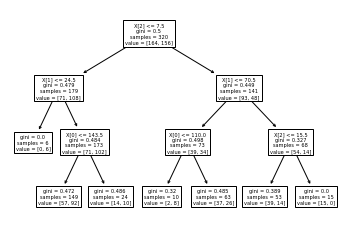

In [34]:
tree.plot_tree(model);

In [35]:
y_train.value_counts()

0    164
1    156
Name: sales, dtype: int64

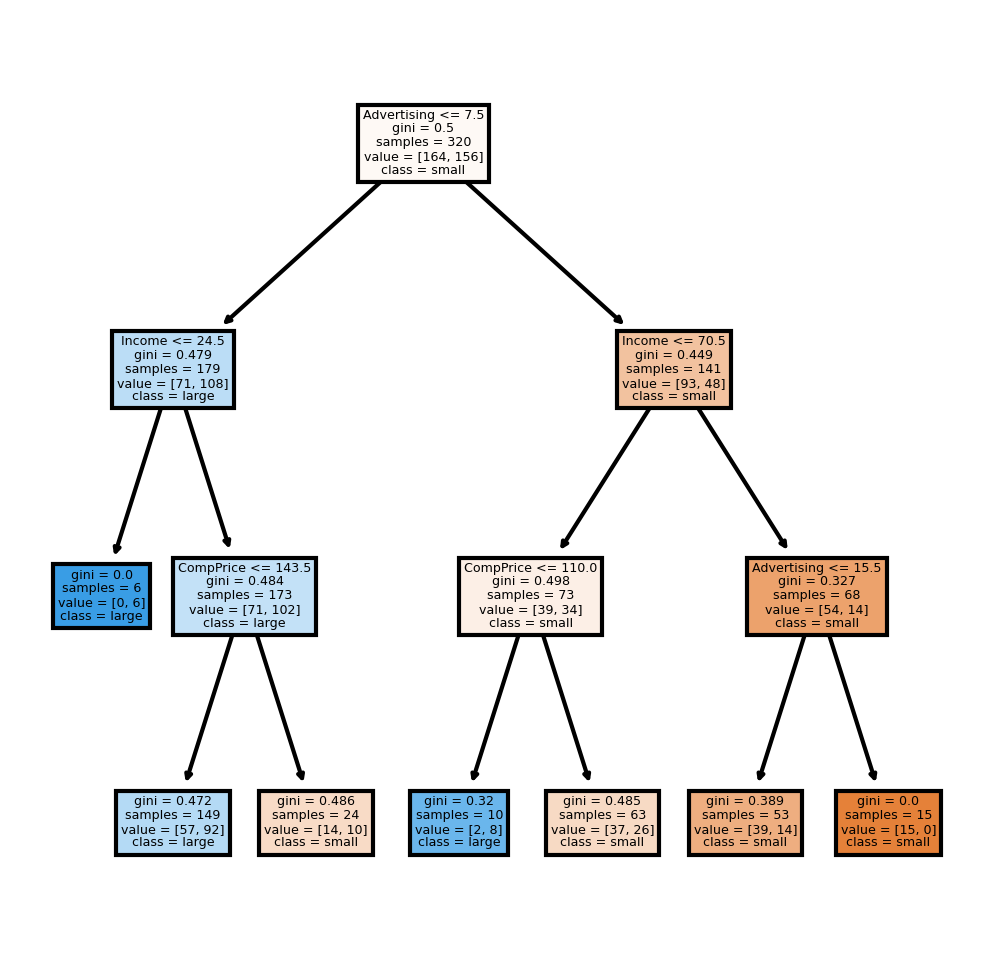

In [36]:
fn=['CompPrice','Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales']
cn=['small','large']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4) ,dpi =300)
tree.plot_tree(model,
              feature_names = fn,
              class_names=cn,
              filled = True);

In [37]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [38]:
array = data1.values
X = array[:,0:3]
y = array[:,3]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [40]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
#Find the accuracy
model.score(X_test,y_test)

-0.8648571382757615

In [42]:
#Find the accuracy
model.score(X_test,y_test)

-0.8648571382757615